In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
from pandas.plotting import autocorrelation_plot

warnings.filterwarnings('ignore')

1.  Probability Distributions  In studying signals, we require the help of 
random variables to model the randomness in them. This randomness is
also useful in predicting the nature of noise.


• Continuous distributions Plot the PDF and CDF for the following
distributions by taking at least three different sets of parameters for
each. Vary the parameters to get at least 3 different realizations of
each: Uniform (a,b), Exponential (λ), Gamma (γ), Beta (β), Gaussian (µ,σ),
Standard Normal (0, 1), Chi-squared (k). How many of
these distributions are non negative? Calculate the mean median
mode and variance and plot it with the PDF in a single plot for one
distribution. Also draw the CDFs separately.
Consider a signal with 2 orthogonal components X, Y . 
Each component is a random variable that is independent of the other and 
follows Gaussian distribution with 0 mean and equal variances σ
2 = 4.
Can you find the distribution of the power content of the signal i.e.
P ower = X2 + Y2 ,Which distribution is this? Is it a non negative
distribution? Compute the mean median mode and variance and plot
with the PDF

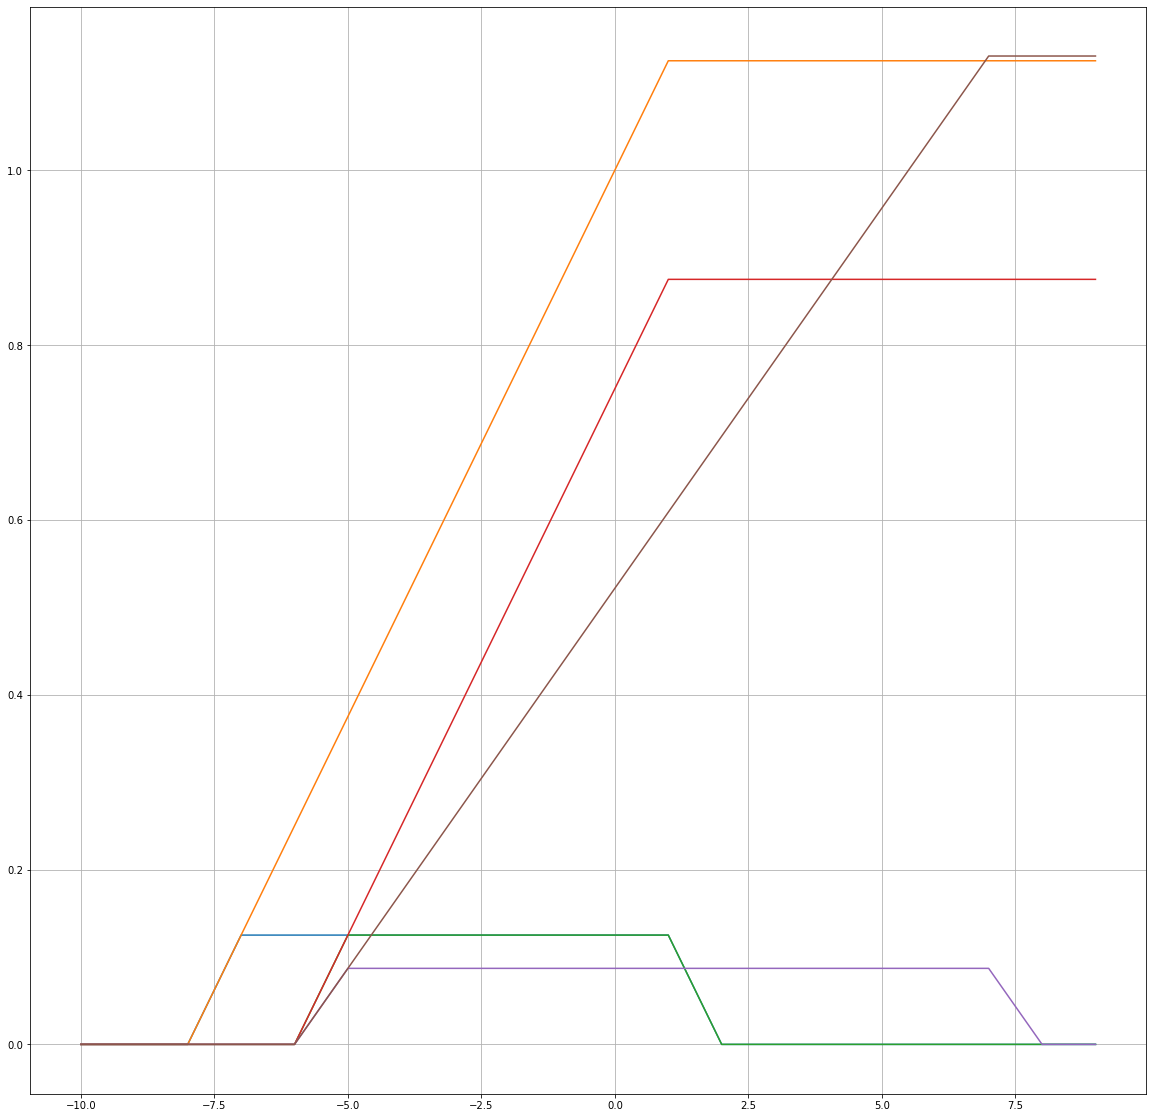

In [186]:
#uniform(magnitude always remains positive...)
plt.figure(figsize=(20,20))
x=np.arange(-10,10)
s=np.array([-7,2,-5,7.5])




for i in range(3):
    uni_pdf=abs((1/(1+s[i]-s[i+1]))*((x-s[i]>=0)-1*(x-s[i+1]>=0)))
    plt.plot(x,uni_pdf)
    uni_cdf=np.cumsum(uni_pdf)
    plt.plot(x,uni_cdf)
    plt.grid("on")

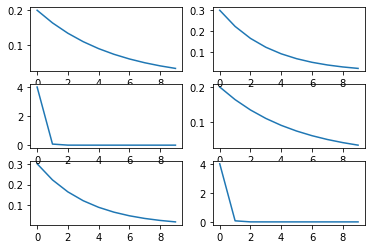

In [187]:
#Exponential(lemda)(Time diffrence between two consecutive occurence is modelled as exponential)
x=np.arange(0,10)
lemda=np.array([.2,.3,4])
for i in range(lemda.size):
    exp_pdf=lemda[i]*np.exp(-lemda[i]*x)
    plt.subplot(3,2,i+1)
    plt.plot(x,exp_pdf)
    exp_cdf=np.cumsum(exp_pdf)
    plt.subplot(3,2,i+4)
    plt.plot(x,exp_pdf)

In [188]:
import math as m
x = np.arange(0,40,0.01)
lst = []
alpha = [1,2,3]
beta = [3,2,1]
plt.figure(figsize=(10,8))
for k in range(3):
    y = np.zeros(len(x))
    z = np.zeros(len(x))
    for i in range(1,len(x)):
        y[i] = (m.pow(beta[k],-alpha[k]) * m.pow(x[i],alpha[k]-1) * np.exp(-x[i]/beta[k]))/m.gamma(alpha[k])
        z[i] = z[i-1] + ((m.pow(beta[k],-alpha[k]) * m.pow(x[i],alpha[k]-1) * np.exp(-x[i]/beta[k]))/m.gamma(alpha[k]))*0.01
    lst.append(["alpha= "+str(alpha[k]),"beta ="+str(beta[k]),"pdf","mean ="+str(Mean(x,y)),"median ="+str(Median(x,z)),"mode ="+str(Mode(x,y)),"variance ="+str(Variance(x,y))])
    lst.append(["alpha= "+str(alpha[k]),"beta ="+str(beta[k]),"cdf"])
    plt.plot(x,y)
    plt.plot(x,z)
    plt.grid()
plt.legend(lst, loc ="upper left")
plt.xlabel("time x")
plt.ylabel("pdf and cdf of gamma")
plt.title("pdf and cdf of continous gamma distribution")

NameError: name 'Mean' is not defined

<Figure size 720x576 with 0 Axes>

In [ ]:
#beta
#beta distribution
from scipy.stats import beta
a=[80,200,60]
b=[10,30,41]

#generate the value in between 
for i in range(3):
    x=np.linspace(beta.ppf(0.01,a[i],b[i]),beta.ppf(0.99,a[i],b[i]))
    plt.subplot(3,2,i+1)
    plt.plot(x,beta.pdf(x,a[i],b[i]))
    plt.subplot(3,2,i+1)
    plt.plot(x,np.cumsum(beta.pdf(x,a[i],b[i])))



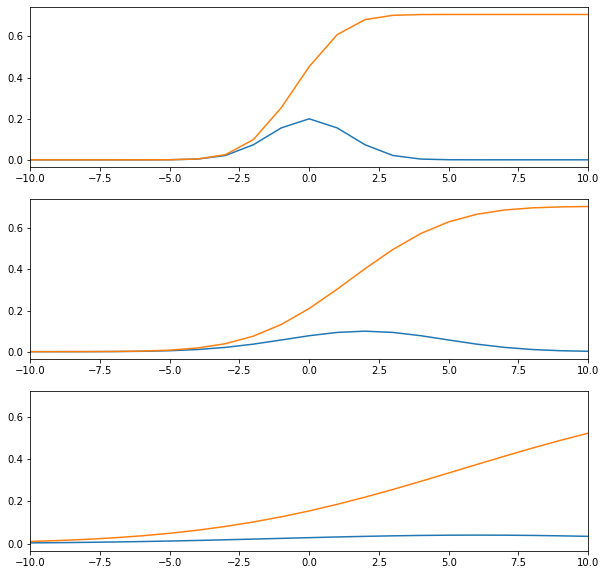

In [189]:
#gaussian Distributuion
x=np.arange(-20,20)
plt.figure(figsize=(10,10))

sig=[2,4,10]
mue=[0,2,6]
for i in range (3):

    pdf=(1/(2*math.pi*sig[i]*sig[i])**.5)*((math.e)**-(((x-mue[i])*1/sig[i])**2))
    plt.subplot(3,1,i+1)
    plt.plot(x,pdf)
    plt.xlim(-10,10)
    plt.plot(x,np.cumsum(pdf))

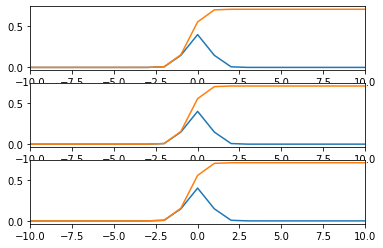

In [190]:
#Standard normal Distribution
for i in range (3):
    pdf=(1/(2*math.pi)**.5)*((math.e)**-(((x-0)/1)**2))
    plt.subplot(3,1,i+1)
    plt.plot(x,pdf)
    plt.xlim(-10,10)
    plt.plot(x,np.cumsum(pdf))

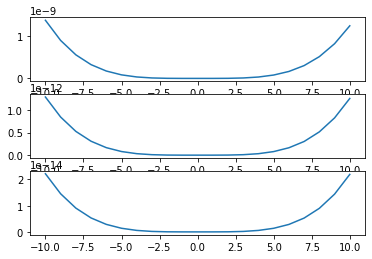

In [191]:
#chi-squared(k), lets say for the degree of freedom k
x=np.linspace(-10,10,21)

sig=[10,20,30]
k=10

for i in range (3):
    pdf= (((x**((k/2)-1)))/(((2**(k/2)))*((sig[i])**k)*(math.gamma(k/2))))*((math.e)**(-x/(2*(sig[i]**2))))
    plt.subplot(3,1,i+1)
    plt.plot(x,pdf)

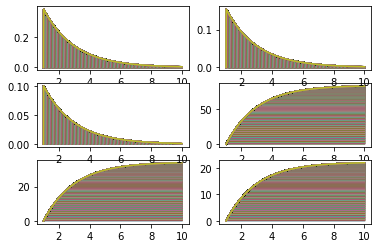

In [192]:
# now fix the siggma and vary the k

x=np.linspace(1,10,1000)
lst=[]
Deg=[1,2,3]
for i in range (len(Deg)):
    y=np.zeros(len(x))
    z=np.zeros(len(x))
    for j in range(1,len(x)):
        y[j]=((x[i])**(Deg[i])/2)*np.exp(-x[j]/2)/(2**(Deg[i]/2))*(m.gamma(Deg[i]/2))
        plt.subplot(3,2,i+1)
        plt.plot(x,y)
        plt.subplot(3,2,i+4)
        plt.plot(x,np.cumsum(y))
    




Text(0.5, 1.0, 'pdf of power (Rayleigh distribution)')

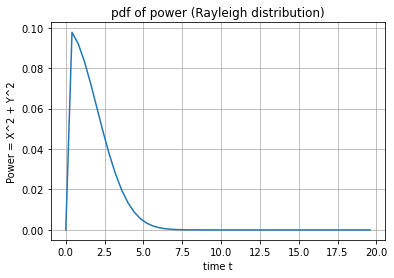

In [193]:

t = np.arange(0,20,0.4)
x = np.zeros(len(t))
y = np.zeros(len(t))
z = np.zeros(len(t))
P = np.zeros(len(t))
for i in range(1,len(t)):
    y[i] = np.exp(-((t[i])**2)/(2*(2**2)))/(4*(2*np.pi)**(0.5))
    x[i] = np.exp(-((t[i])**2)/(2*(2**2)))/(4*(2*np.pi)**(0.5))
    P[i] = x[i]**2 + y[i]**2
    z[i] = z[i-1] + P[i]*0.4
plt.plot(t,x)
plt.grid()
plt.xlabel("time t")
plt.ylabel("Power = X^2 + Y^2")
plt.title("pdf of power (Rayleigh distribution)")

# • Discrete distributions


In [194]:
#write a function to generate a impulse train first.
def Gen_imp(l,m):
    n=np.linspace(l,m,abs(l)+abs(m)+1)
    x=1*(abs(n)>=0)
    return x

Consider a transmitter that can transmit messages only in the form
of 2 bits 0 and 1. The receiver receives a single message sent by the
transmitter say X. Since, we do not know before hand which bit
was sent X follows a certain distribution. Which distribution is this?
Find the PMF and plot it. Also calculate the mean and variance of
X. Assume probability for receiving 0(failure) is p = 0.1, 0.5, 0.8.

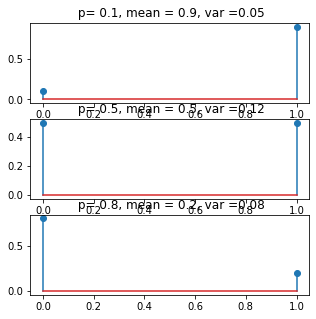

In [195]:
# its a binomial distribution .....as both outcome independent..and only two possuble outcomes available
plt.figure(figsize=(5,5))
P_0=np.array([0.1,0.5,0.8])
P_1=1-P_0
x = np.arange(0,2,1)
for i in range(3):
    plt.subplot(3,1,i+1)
    y = np.array([P_0[i],P_1[i]])
    mean = round(np.sum(x*y),2)
    var = round(np.sum(((x-mean)**2)*y)/(len(x)),2)
    plt.title(" p= "+str(P_0[i]) + ", mean = "+str(mean)+ ", var ="+str(var))
    plt.stem(x,y)

    


Consider the same transmitter but this time the receiver receives 20
bits. Each bit is independent of the previous one. The probability of
receiving a 0 is p = 0:4. Let X be the number of 1s (successes) that
is received at the receiver's end. What is the distribution followed
by X. How is it related to the rst distribution? Calculate the mean
and variance and plot the PMF.

<StemContainer object of 3 artists>

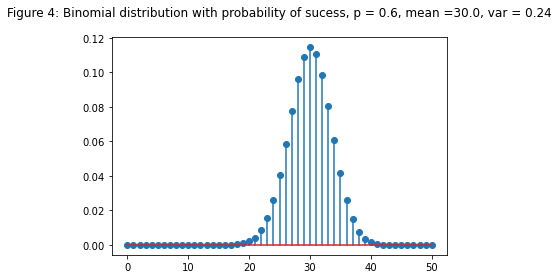

In [216]:
plt.figure(figsize=(6,4))
p = 0.6 # 1-0.4





x = np.arange(0,51)
P = np.zeros(51)
for r in range(51): 
    P[r] = Comb(50,r)*(0.6**r)*(0.4**(50-r))
mean = round(np.sum(x*P),2)
var = round(np.sum(((x-mean)**2)*P)/(len(x)),2)
plt.title("Figure 4: Binomial distribution with probability of sucess, p = "+str(p)+", mean ="+ str(mean)+", var = "+str(var)+"\n")
plt.stem(x,P)


In [198]:
# 3. it should geometric distribution  because it going thill the last even making it potive

plt.figure(figsize=(7,7))





p = 0.5
x = np.linspace(0,50,51)
lst= np.zeros(51)
for r in range(1,51): 
    P[r] = p*((1-p)**(r-1))
plt.stem(x,P)
mean = round(np.sum(x*P),2)
var = round(np.sum(((x-mean)**2)*P)/(len(x)),2)

IndexError: index 50 is out of bounds for axis 0 with size 50

<Figure size 504x504 with 0 Axes>

5.0 [0.09803922 2.5       ]


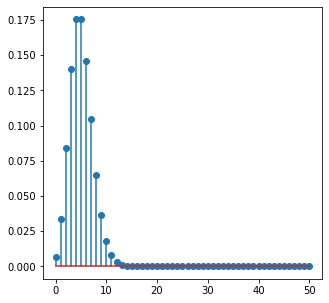

In [199]:
# 4  Here X must follow the poission distribution
plt.figure(figsize=(5,5))
x=np.linspace(0,50,51)

mean=5
#so
lemda=mean

lst=np.zeros(51)

for n in range (51):
    lst[n]=((math.e)**(-lemda))*(lemda**n)/math.factorial(n)

mean=round(np.sum(x*lst),2)
#so variance
variance = round(np.sum(((x-mean)**2)*lst))/(x.size,2)
plt.stem(x,lst)
print(mean,variance)




# 2. Signal measures


Plot the following sequences: x1[n] = [1, 2, 3, 2, 1, 2, 3, 4, 3, 2, 1] 
x2[n] =[1, 2, 1, 2, 1, 2, 1, 2] x3[n] = [1, 2, 3, 2, 4, 6, 4, 8, 12] 
x4[n] = [2, 4, 2, 4, 2, 4, 2, 4] x5[n] = [1, −2, 3, −2, 1, −2, 3, −4, 3, −2, 1] 
and x6[n] = 2 × x1[n] + 1. Calculate the autocorrelation function for a 
delay of 2 samples. Plot theautocorrelation function and find the
power of all the sequences. Also find the cross correlation function for 
all the pairs for a delay of 2 samples. To compute the autocorrelation 
function write a python function


In [173]:
def cross_correlation(x,y):
    y = np.flip(y)
    x = ([np.zeros(len(y)-1),x])
    y = ([y,np.zeros(len(x)-1)])
    
    N = len(x) + len(y) - 1
    o = np.zeros((len(x),len(y)))
    O = np.zeros(len(x) + len(y)- 1)
    
    for i in range(len(x)):
        for j in range(len(y)):
            o[i][j] = x[i]*y[j]
    
    for index in range(N):
        for i in range(len(x)):
            for j in range(len(y)):
                if i + j == index:
                    O[index] += o[i][j]
                    
    neg = O[:np.argmax(O)]
    pos = O[np.argmax(O):]
    return neg,pos

ValueError: x and y must have same first dimension, but have shapes (41,) and (15,)

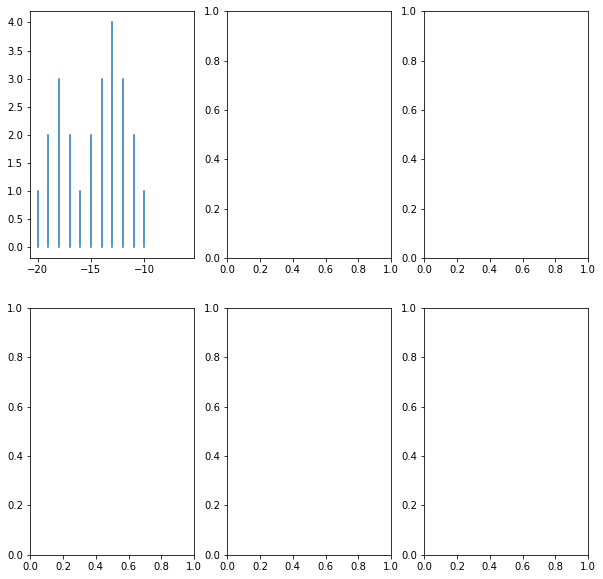

In [184]:

n=np.arange(0,14,15)



x = np.zeros((6,15),int)
x[0] = np.array([1, 2, 3, 2, 1, 2, 3, 4, 3, 2, 1,0,0,0,0])
x[1] = np.array([1, 2, 1, 2, 1, 2, 1, 2, 0, 0, 0,0,0,0,0])
x[2] = np.array([1, 2, 3, 2, 4, 6, 4, 8, 12, 0, 0,0,0,0,0])
x[3] = np.array([2, 4, 2, 4, 2, 4, 2, 4, 0, 0, 0,0,0,0,0])
x[4] = np.array([1,-2, 3,-2, 1,-2, 3, -4, 3,-2, 1,0,0,0,0])
x[5] = 2*x[0] + 1

f,axs = plt.subplots(2,3 ,figsize=(10,10))

for i in range(6):
    axs[i//3, i%3].stem(t,x[i])
    axs[i//3, i%3].set_title("x%d" %(i+1))
    

ValueError: operands could not be broadcast together with shapes (14,) (15,) 

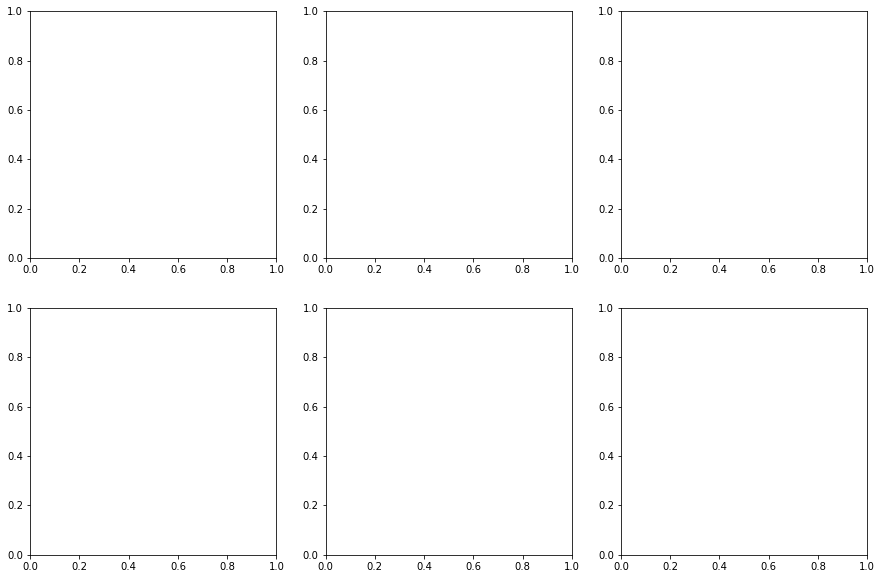

In [ ]:
x1_s=x1.shift(2)
x2_s=x2.shift(2)
x3_s=x3.shift(2)
x4_s=x4.shift(2)
x5_s=x5.shift(2)
x6_s=x6.shift(2)

In [ ]:
plt.figure(figsize=(7,7))
for i i range (3)

In [ ]:
x = pd.plotting.autocorrelation_plot(x5) 
x.plot()

# 3. Noise
Generate an uncorrelated uniform random noise sequence, an uncorrelated
white noise sequence, and a red noise sequence. Why are they called so?
What are their distributions?
Generate a random sinusoid x[n] = Acos(!0n + ) where A is uniformly
distributed random variable in [0,4] and  is uniformly distributed random
variable in [0; 2].
Generate a noisy sinusoid with amplitude 5 and frequence ! = 2. Use
the gaussian noise of mean 0 and variance 1 to be used as an envelope
(Envelope is a signal which decides the outer structure whereas sinusoid
will be embedded in some way to the gaussian noise).
Bonus(Ungraded): Try visualizing the eects of noise addition to im-
ages and a recorded wavle. Use the speckle, salt and pepper, gaussian
noises in images and just gaussian noise in wavle. Is there any way to
remove this noise? Also visualize any waveforms before and after adding
noise to it and how it behaves

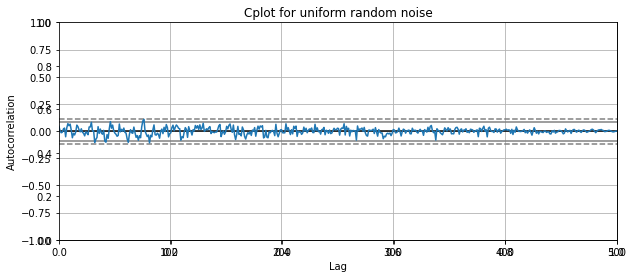

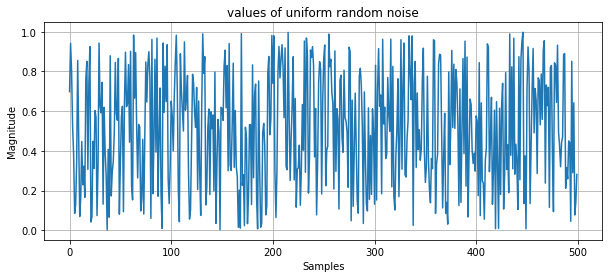

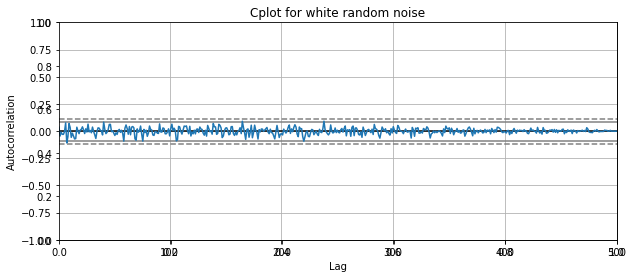

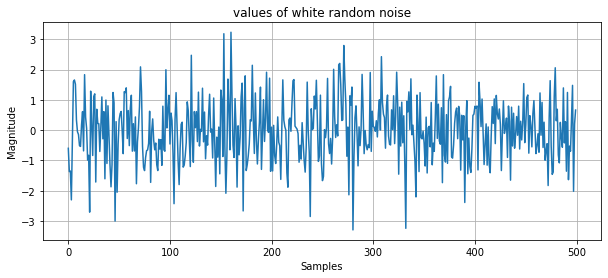

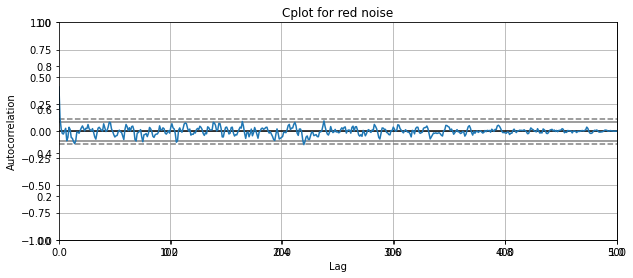

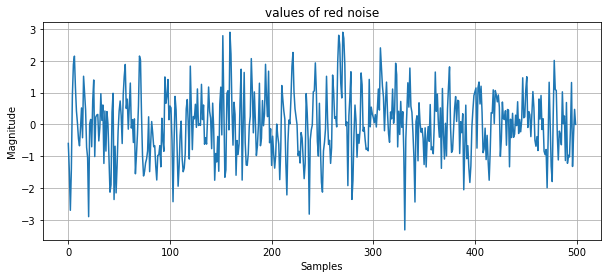

In [181]:

mean = 0
std = 5
num_samples = 500

white = np.random.normal(mean, std)
uniform = np.random.uniform(0, 1)

red = np.zeros(num_samples)
red[0] = samples_white[0]
r = 0.4
for i in range(1,num_samples-1):
    samples_red[i]  = r*samples_red[i-1]  + ((1 - r**2)**0.5)*samples_white[i+1]

noise = [samples_uniform,samples_white,samples_red]
labels = ["uniform random noise","white random noise","red noise"]
j = 0

for i in range(3):
    j=j+ 1
    plt.figure(j,figsize=(10,4))
    plt.title("Cplot for %s"%(str(labels[i])))
    autocorrelation_plot(noise[i])
    plt.show()
    j=j+1
    plt.figure(j,figsize=(10,4))
    plt.title("values of %s"%(str(labels[i])))
    plt.xlabel("Samples")
    plt.ylabel("Magnitude")
    plt.grid("on")
    plt.plot(noise[i])
 
